In [8]:
import numpy as np
import pandas as pd

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir
plotPath=homedir+'/plots/'
plotPath

'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots/'

### Light Curve Data ###
Author: Mimmo (Domenico Nardiello)

**Headers explanation:**

- col 1: TIME[d]: BTJD (BJD-2457000.0)
- col 2: TIMECORR[d]: Barycentric correction already applied to the col 1, anyway in this case is zero
- col 3: PSF_FLUX_RAW[e-/s] PSF-fitting RAW photometry flux
- col 4: PSF_FLUX_COR[e-/s] col 3, CORRECTED for CBV
- col 5: AP1_FLUX_RAW[e-/s] 1-px aperture photometry RAW flux
- col 6: AP1_FLUX_COR[e-/s] 1-px aperture photometry CORRECTED flux
- ... so on for col 7-12 for 2-px, 3-px, 4-px aperture photometry
- col 13: SKY_LOCAL[e-/s] Local sky background
- col 14, 15: X_POSITION[pixel] / Y_POSITION[pixel] The X/Y positions on the CCD
- col 16: DQUALITY flag. Ggood points have DQUALITY==0

**Light-curve cleaning:**

- Exclude DQUALITY>0.
- Background cut/include: 
    - include only the points with sky < mean_sky+4sigma
    - and all the points with sky>200 or 250 e/s (Depends on how faint is the star... maybe in this case it's better 200 as threshold)

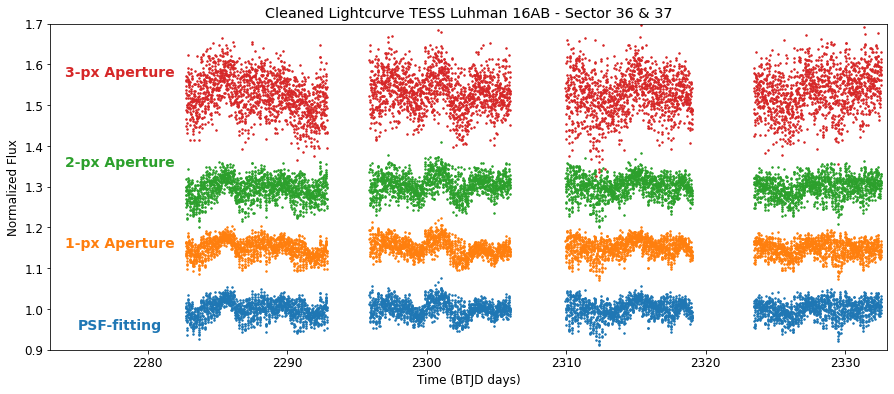

In [9]:
### SECTOR 36 Light Curve
lc36_path = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/raw/luhman16_extended_mission/hlsp_pathos_tess_lightcurve_tic-0936441397-s036_tess_v1_llc.txt"

### SECTOR 37 Light Curve
lc37_path = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/raw/luhman16_extended_mission/hlsp_pathos_tess_lightcurve_tic-0936441397-s037_tess_v1_llc.txt"

headerstring = "TIME TIMECORR PSF_FLUX_RAW PSF_FLUX_COR AP1_FLUX_RAW AP1_FLUX_COR AP2_FLUX_RAW AP2_FLUX_COR AP3_FLUX_RAW AP3_FLUX_COR AP4_FLUX_RAW AP4_FLUX_COR SKY_LOCAL X_POSITION Y_POSITION DQUALITY"
headers = headerstring.split()

lc36_data_raw = pd.read_csv(lc36_path, names=headers, skiprows=26, sep='\s+')
lc37_data_raw = pd.read_csv(lc37_path, names=headers, skiprows=26, sep='\s+')

### Light curve cleaning: OLD METHOD (WRONG)
# sky36_threshold = lc36_data_raw.SKY_LOCAL.mean() + 4*lc36_data_raw.SKY_LOCAL.std()
# sky36_noise = 250 #(e s^-1)
# lc37_data = lc37_data_raw.query("DQUALITY == 0 & PSF_FLUX_COR>%f & PSF_FLUX_COR<=%f"%(sky36_noise, sky36_threshold))
# lc36_data = lc36_data_raw.query("DQUALITY == 0 & PSF_FLUX_COR>%f & PSF_FLUX_COR<=%f"%(sky36_noise, sky36_threshold))

### Light curve cleaning: CORRECT METHOD
skyLOCALnoise = 140 #(e s^-1)

lc36_data = lc36_data_raw.query("DQUALITY == 0 & SKY_LOCAL<=%f & SKY_LOCAL>=%f"%(skyLOCALnoise, 50))
sky36_threshold = lc36_data.SKY_LOCAL.mean() + 4*lc36_data.SKY_LOCAL.std()
lc36_data = lc36_data.query("SKY_LOCAL<=%f"%(sky36_threshold))

lc37_data = lc37_data_raw.query("DQUALITY == 0 & SKY_LOCAL<=%f & SKY_LOCAL>=%f"%(skyLOCALnoise, 50))
sky37_threshold = lc37_data.SKY_LOCAL.mean() + 4*lc37_data.SKY_LOCAL.std()
lc37_data = lc37_data.query("SKY_LOCAL<=%f"%(sky37_threshold))

lc36_data_clean = lc36_data
lc37_data_clean = lc37_data

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12}) 

### PSF-Flux Plots, COMPARISON WITH OTHER APERTURES
save = False
# save = True

ms = 1.5
lw = 0.1
txtsize = 14
xx = 2278
yy = 0.95

plt.close()
# plt.figure(figsize=(7.5, 7.5)), plt.title('Cleaned Lightcurve TESS Luhman 16AB - Sector 36 & 37')
plt.figure(figsize=(15, 6)), plt.title('Cleaned Lightcurve TESS Luhman 16AB - Sector 36 & 37')

plt.text(xx,yy,'PSF-fitting',horizontalalignment='center',fontsize=txtsize, c='tab:blue', weight='bold')
plt.plot(lc36_data.TIME, lc36_data.PSF_FLUX_COR/lc36_data.PSF_FLUX_COR.mean(), 
         ls='', marker='o', ms=ms, c = 'tab:blue')
plt.plot(lc37_data.TIME, lc37_data.PSF_FLUX_COR/lc37_data.PSF_FLUX_COR.mean(), 
         ls='', marker='o', ms=ms, c = 'tab:blue')

plt.text(xx,yy+0.2,'1-px Aperture',horizontalalignment='center',fontsize=txtsize, c='tab:orange', weight='bold')
plt.plot(lc36_data.TIME, lc36_data.AP1_FLUX_COR/lc36_data.AP1_FLUX_COR.mean()+0.15, 
         ls='', marker='o', ms=ms, c ='tab:orange')
plt.plot(lc37_data.TIME, lc37_data.AP1_FLUX_COR/lc37_data.AP1_FLUX_COR.mean()+0.15, 
         ls='', marker='o', ms=ms, c = 'tab:orange')

plt.text(xx,yy+0.4,'2-px Aperture',horizontalalignment='center',fontsize=txtsize, c='tab:green', weight='bold')
plt.plot(lc36_data.TIME, lc36_data.AP2_FLUX_COR/lc36_data.AP2_FLUX_COR.mean()+0.3, 
         ls='', marker='o', ms=ms, c ='tab:green')
plt.plot(lc37_data.TIME, lc37_data.AP2_FLUX_COR/lc37_data.AP2_FLUX_COR.mean()+0.3, 
         ls='', marker='o', ms=ms, c = 'tab:green')

plt.text(xx,yy+0.62,'3-px Aperture',horizontalalignment='center',fontsize=txtsize, c='tab:red', weight='bold')
plt.plot(lc36_data.TIME, lc36_data.AP3_FLUX_COR/lc36_data.AP3_FLUX_COR.mean()+0.53, 
         ls='', marker='o', ms=ms, c ='tab:red')
plt.plot(lc37_data.TIME, lc37_data.AP3_FLUX_COR/lc37_data.AP3_FLUX_COR.mean()+0.53, 
         ls='', marker='o', ms=ms, c = 'tab:red')
plt.xlabel('Time (BTJD days)'), plt.ylabel('Normalized Flux')
plt.xlim((2273, 2333))
plt.ylim((0.9, 1.7))

if save:
    outputname = "0_tess_lightcurve"
    plt.savefig(join(plotPath, outputname+'.pdf'), dpi=300, bbox_inches = 'tight')
    plt.savefig(join(plotPath, outputname+'.png'), dpi=300, bbox_inches = 'tight')

plt.show()

************ SECTOR 36  *************
SKY_LOCAL RAW MEAN+1 sigma: 279.493 e/s
SKY_LOCAL RAW MEAN+2 sigma: 390.845 e/s
SKY_LOCAL RAW MEAN+3 sigma: 502.196 e/s
SKY_LOCAL RAW MEAN+4 sigma: 613.548 e/s
SKY_LOCAL CLEAN mean+1 sigma: 135.984 e/s
SKY_LOCAL CLEAN mean+2 sigma: 136.329 e/s
SKY_LOCAL CLEAN mean+3 sigma: 136.674 e/s
SKY_LOCAL CLEAN mean+4 sigma: 137.019 e/s


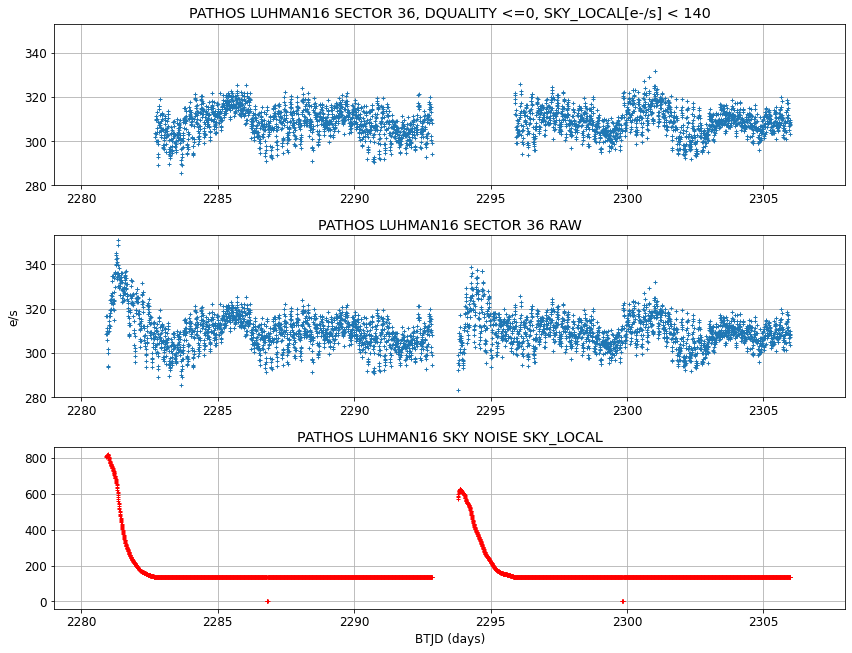

In [10]:
## PLOT EVOLUTION OF SKY_LOCAL, PRINT STANDARD DEVIATION 
print('************ SECTOR 36  *************')
xr = lc36_data_raw['TIME']
yr = lc36_data_raw['PSF_FLUX_COR']
skyNoise = lc36_data_raw['SKY_LOCAL']

mean = np.mean(lc36_data_raw['SKY_LOCAL'])
std = np.std(lc36_data_raw['SKY_LOCAL'])
for i in np.arange(4):
    print('SKY_LOCAL RAW MEAN+%i sigma: %.3f e/s'%(i+1, mean + (i+1)*std) )

mean = np.mean(lc36_data['SKY_LOCAL'])
std = np.std(lc36_data['SKY_LOCAL'])
for i in np.arange(4):
    print('SKY_LOCAL CLEAN mean+%i sigma: %.3f e/s'%(i+1, mean + (i+1)*std) )
    
x1 = lc36_data['TIME']
y1 = lc36_data['PSF_FLUX_COR']

# %matplotlib widget
plt.close()
plt.figure(figsize=(12,9)), 
plt.subplot(3,1,1), plt.title('PATHOS LUHMAN16 SECTOR 36, DQUALITY <=0, SKY_LOCAL[e-/s] < %i'%skyLOCALnoise)
plt.plot(x1,y1,ls='', marker='+', ms=4)
plt.xlim([2279, 2308]), plt.ylim([280, 353])
plt.tight_layout(), plt.grid()

plt.subplot(3,1,2), plt.title('PATHOS LUHMAN16 SECTOR 36 RAW')
plt.plot(xr,yr,ls='', marker='+', ms=4)
plt.xlim([2279, 2308]),plt.ylim([280, 353])
plt.tight_layout(), plt.grid(), plt.ylabel('e/s')

plt.subplot(3,1,3), plt.title('PATHOS LUHMAN16 SKY NOISE SKY_LOCAL')
plt.plot(xr, skyNoise, ls='', marker='+', ms=4, c='r')
plt.xlim([2279, 2308])
plt.tight_layout(), plt.grid(), plt.xlabel('BTJD (days)')

if save:
    plt.savefig("/Users/fuda/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots/0_flux_skynoise_s36.pdf")

************ SECTOR 37  *************
SKY_LOCAL RAW MEAN+1 sigma: 192.405 e/s
SKY_LOCAL RAW MEAN+2 sigma: 233.182 e/s
SKY_LOCAL RAW MEAN+3 sigma: 273.959 e/s
SKY_LOCAL RAW MEAN+4 sigma: 314.736 e/s
SKY_LOCAL CLEAN mean+1 sigma: 137.375 e/s
SKY_LOCAL CLEAN mean+2 sigma: 138.103 e/s
SKY_LOCAL CLEAN mean+3 sigma: 138.832 e/s
SKY_LOCAL CLEAN mean+4 sigma: 139.560 e/s


(None, None, Text(0.5, -11.039999999999988, 'BTJD (days)'))

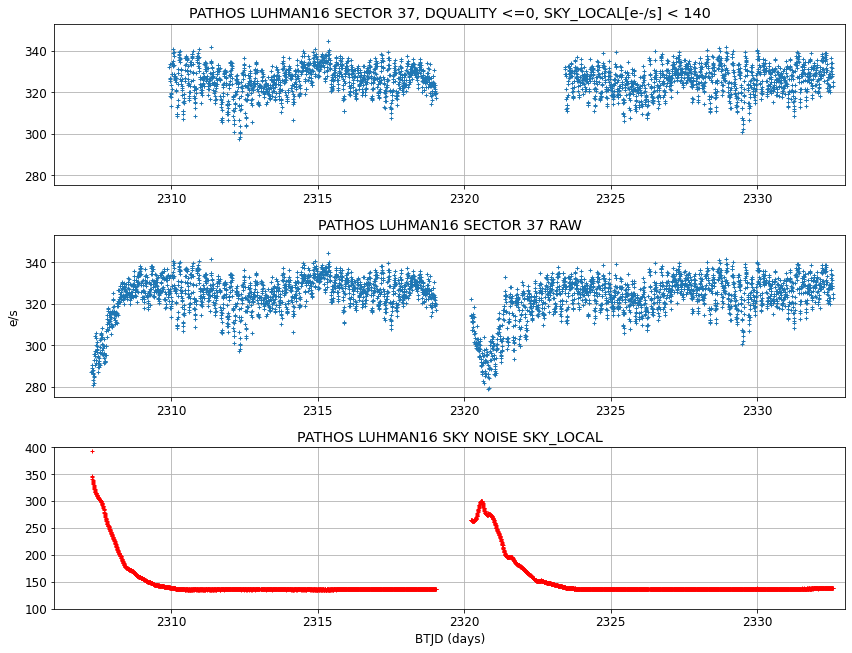

In [11]:
## PLOT EVOLUTION OF SKY_LOCAL, PRINT STANDARD DEVIATION 
print('************ SECTOR 37  *************')
xr = lc37_data_raw['TIME']
yr = lc37_data_raw['PSF_FLUX_COR']
skyNoise = lc37_data_raw['SKY_LOCAL']

mean = np.mean(lc37_data_raw['SKY_LOCAL'])
std = np.std(lc37_data_raw['SKY_LOCAL'])
for i in np.arange(4):
    print('SKY_LOCAL RAW MEAN+%i sigma: %.3f e/s'%(i+1, mean + (i+1)*std) )

mean = np.mean(lc37_data['SKY_LOCAL'])
std = np.std(lc37_data['SKY_LOCAL'])
for i in np.arange(4):
    print('SKY_LOCAL CLEAN mean+%i sigma: %.3f e/s'%(i+1, mean + (i+1)*std) )
    
x1 = lc37_data['TIME']
y1 = lc37_data['PSF_FLUX_COR']

# %matplotlib widget
plt.close()
plt.figure(figsize=(12,9)), 
plt.subplot(3,1,1), plt.title('PATHOS LUHMAN16 SECTOR 37, DQUALITY <=0, SKY_LOCAL[e-/s] < %i'%skyLOCALnoise)
plt.plot(x1,y1,ls='', marker='+', ms=4)
plt.xlim([2306, 2333]), plt.ylim([275, 353])
plt.tight_layout(), plt.grid()

plt.subplot(3,1,2), plt.title('PATHOS LUHMAN16 SECTOR 37 RAW')
plt.plot(xr,yr,ls='', marker='+', ms=4)
plt.xlim([2306, 2333]), plt.ylim([275, 353])
plt.tight_layout(), plt.grid(), plt.ylabel('e/s')

plt.subplot(3,1,3), plt.title('PATHOS LUHMAN16 SKY NOISE SKY_LOCAL')
plt.plot(xr, skyNoise, ls='', marker='+', ms=4, c='r')
plt.xlim([2306, 2333]), plt.ylim([100, 400])
plt.tight_layout(), plt.grid(), plt.xlabel('BTJD (days)')

(Text(0.5, 0, 'Time (BTJD) (days)'),
 Text(0, 0.5, 'Normalized Flux'),
 <matplotlib.legend.Legend at 0x7fe6b35c0d90>)

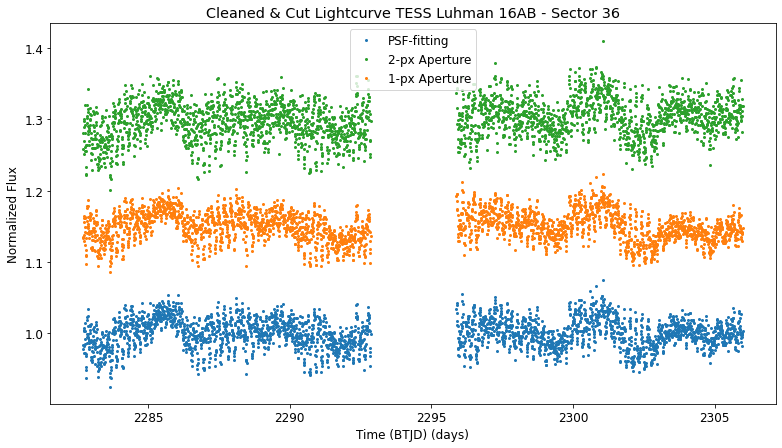

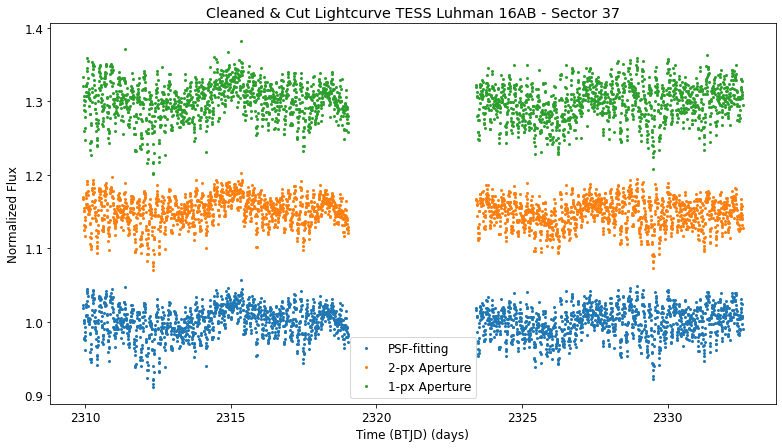

In [12]:
## Clean out bad data points and artifact at sector starts
## NOT USED IN FINAL ROUTINE: JUST BASED ON SKY_LOCAL NOISE INSTEAD OF TIME.
plt.figure(figsize=(12,7))
plt.plot(lc36_data.TIME, lc36_data.AP3_FLUX_COR/lc36_data.AP2_FLUX_COR.mean()/lc36_data.AP3_FLUX_COR.mean(), 
         marker='o', ms=2, linewidth=0.3, c = 'tab:blue', label="AP3/AP2 Normalized Flux")
plt.plot(lc37_data.TIME, lc37_data.AP3_FLUX_COR/lc37_data.AP2_FLUX_COR.mean()/lc37_data.AP3_FLUX_COR.mean(), 
         marker='o', ms=2, linewidth=0.3, c = 'tab:blue')

## Plot mean line
plt.axhline(y=0.00488, ls='--', color='k')

## Plot horizontal cuts
h1, h2 = 0.00569, 0.00406
plt.axhline(y=h1, ls='--', color='r')
plt.axhline(y=h2, ls='--', color='r')

## Plot vertical cuts 
#1
x1, x2 = 2280.40, 2282.90
plt.axvline(x=x1, ls='--', color='g')
plt.axvline(x=x2, ls='--', color='g')
#2
x3, x4 = 2293.45, 2295.95
plt.axvline(x=x3, ls='--', color='g')
plt.axvline(x=x4, ls='--', color='g')
#3
x5, x6 = 2307.0, 2309.50
plt.axvline(x=x5, ls='--', color='g')
plt.axvline(x=x6, ls='--', color='g')
#4
x7, x8 = 2319.90, 2322.40
plt.axvline(x=x7, ls='--', color='g')
plt.axvline(x=x8, ls='--', color='g')

queryCutlc36 = '(TIME >= %f & TIME < %f) | (TIME >= %f & TIME < %f)'%(x2,x3,x4,x5)
queryCutlc37 = '(TIME >= %f & TIME < %f) | (TIME >= %f)'%(x6,x7,x8)
# lc36_data_clean = lc36_data.query(queryCutlc36)
# lc37_data_clean = lc37_data.query(queryCutlc37)

lc36_data_clean = lc36_data
lc37_data_clean = lc37_data

## PLOT CUT LIGHTCURVE - SECTOR 36
plt.close()
plt.figure(figsize=(13, 7)), plt.title('Cleaned & Cut Lightcurve TESS Luhman 16AB - Sector 36')
plt.plot(lc36_data_clean.TIME, lc36_data_clean.PSF_FLUX_COR/lc36_data_clean.PSF_FLUX_COR.mean(), 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:blue', label="PSF-fitting")
plt.plot(lc36_data_clean.TIME, lc36_data_clean.AP2_FLUX_COR/lc36_data_clean.AP2_FLUX_COR.mean()+0.3, 
         marker='o', ls='', ms=2, linewidth=0.3, c ='tab:green', label="2-px Aperture")
plt.plot(lc36_data_clean.TIME, lc36_data_clean.AP1_FLUX_COR/lc36_data_clean.AP1_FLUX_COR.mean()+0.15, 
         marker='o', ls='', ms=2, linewidth=0.3, c ='tab:orange', label="1-px Aperture")
plt.xlabel('Time (BTJD) (days)'), plt.ylabel('Normalized Flux'), plt.legend()

## PLOT CUT LIGHTCURVE - SECTOR 37
plt.figure(figsize=(13, 7)), plt.title('Cleaned & Cut Lightcurve TESS Luhman 16AB - Sector 37')
plt.plot(lc37_data_clean.TIME, lc37_data_clean.PSF_FLUX_COR/lc37_data_clean.PSF_FLUX_COR.mean(), 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:blue', label="PSF-fitting")
plt.plot(lc37_data_clean.TIME, lc37_data_clean.AP1_FLUX_COR/lc37_data_clean.AP1_FLUX_COR.mean()+0.15, 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:orange', label="2-px Aperture")
plt.plot(lc37_data_clean.TIME, lc37_data_clean.AP2_FLUX_COR/lc37_data_clean.AP2_FLUX_COR.mean()+0.3, 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:green', label="1-px Aperture")
plt.xlabel('Time (BTJD) (days)'), plt.ylabel('Normalized Flux'), plt.legend()

In [13]:
# Data write out
save = False
import warnings
warnings.filterwarnings('ignore')

outpath = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/"
lc_out_path = "luhman_16ab_sector36-37.txt"

lc36_flux_mean = lc36_data_clean.PSF_FLUX_COR.mean()
lc36_data_clean['PSF_FLUX_NORM'] = lc36_data_clean.PSF_FLUX_COR / lc36_flux_mean
lc36_data_clean['PSF_EFLUX'] = 0.047*lc36_data_clean['PSF_FLUX_NORM']

lc37_flux_mean = lc37_data_clean.PSF_FLUX_COR.mean()
lc37_data_clean['PSF_FLUX_NORM'] = lc37_data_clean.PSF_FLUX_COR / lc37_flux_mean
lc37_data_clean['PSF_EFLUX'] = 0.047*lc37_data_clean['PSF_FLUX_NORM']

frames = [lc36_data_clean[['TIME', 'PSF_FLUX_NORM','PSF_EFLUX', 'X_POSITION', 'Y_POSITION', 'DQUALITY']],
          lc37_data_clean[['TIME', 'PSF_FLUX_NORM','PSF_EFLUX', 'X_POSITION', 'Y_POSITION', 'DQUALITY']]]

lc3637 = pd.concat(frames)
if save: lc3637.to_csv(outpath+lc_out_path, sep='\t', index=False)

# Boxcar averaging to remove long periods 
### Signal smoothing with astropy to separate out long-period and short-period

(0.93, 1.06)

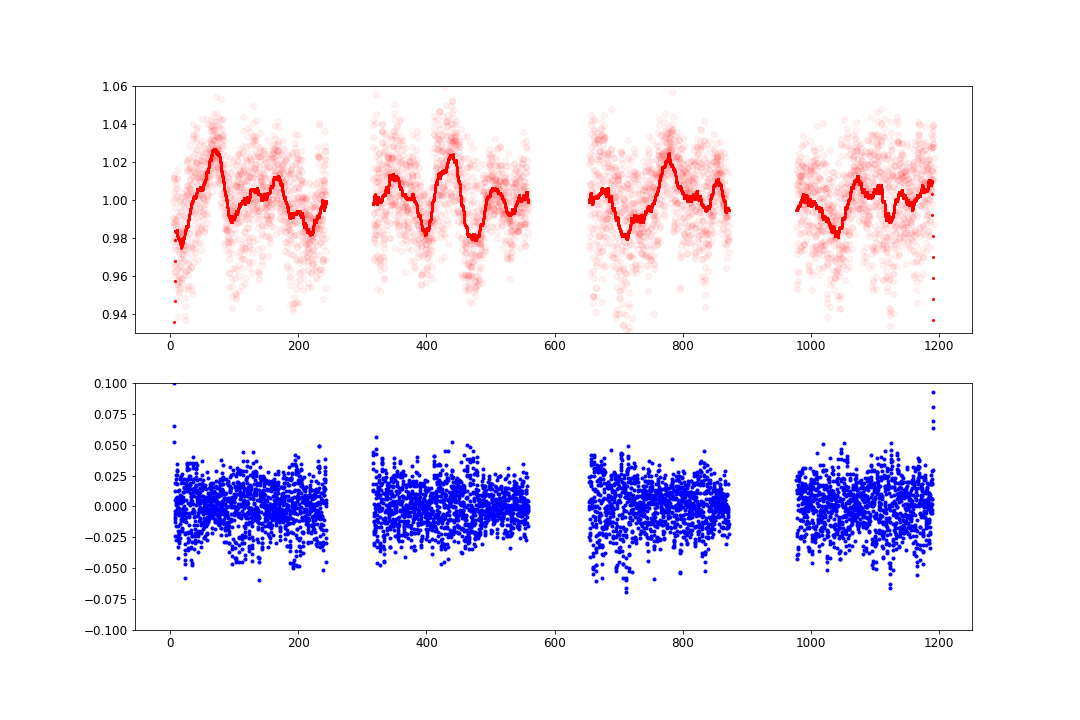

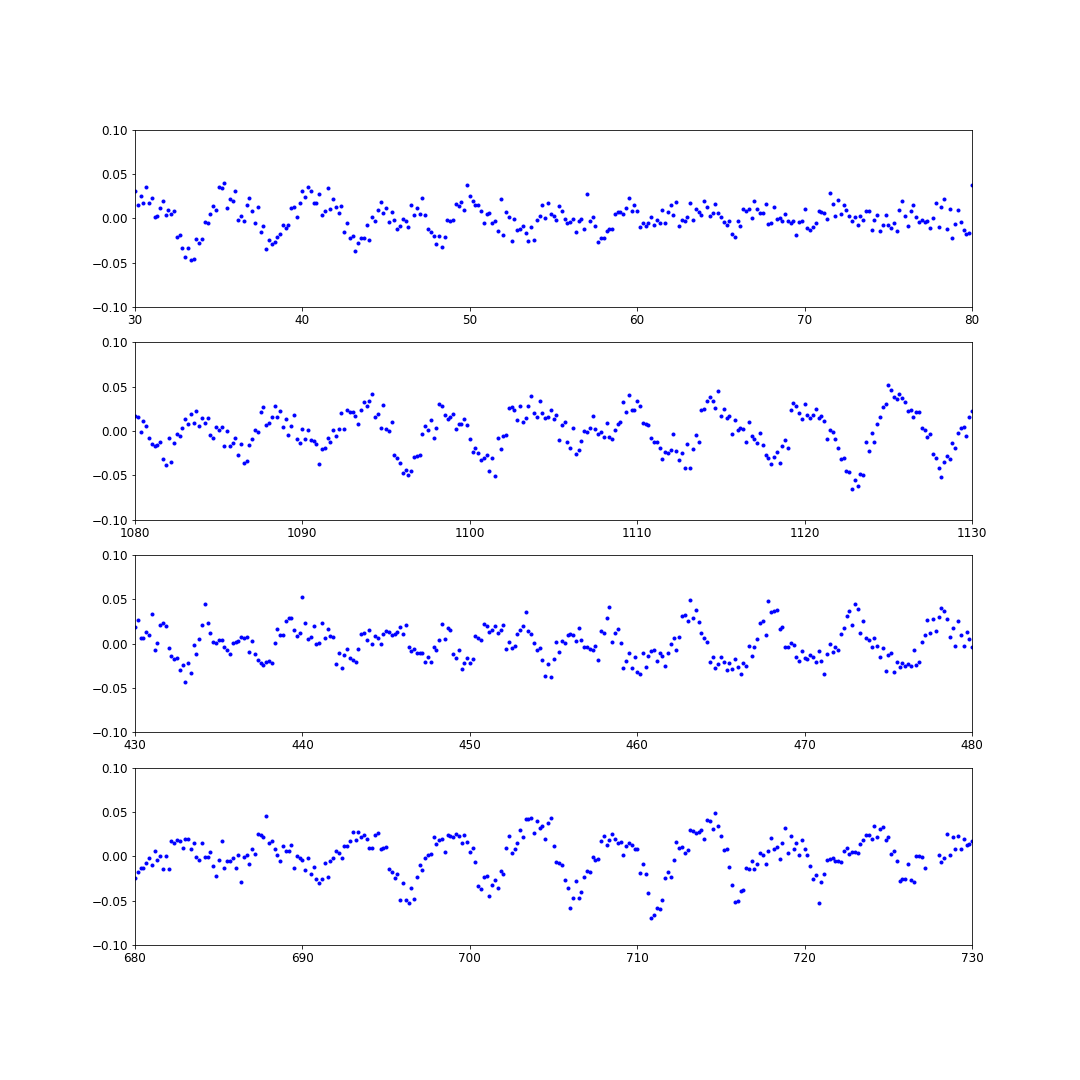

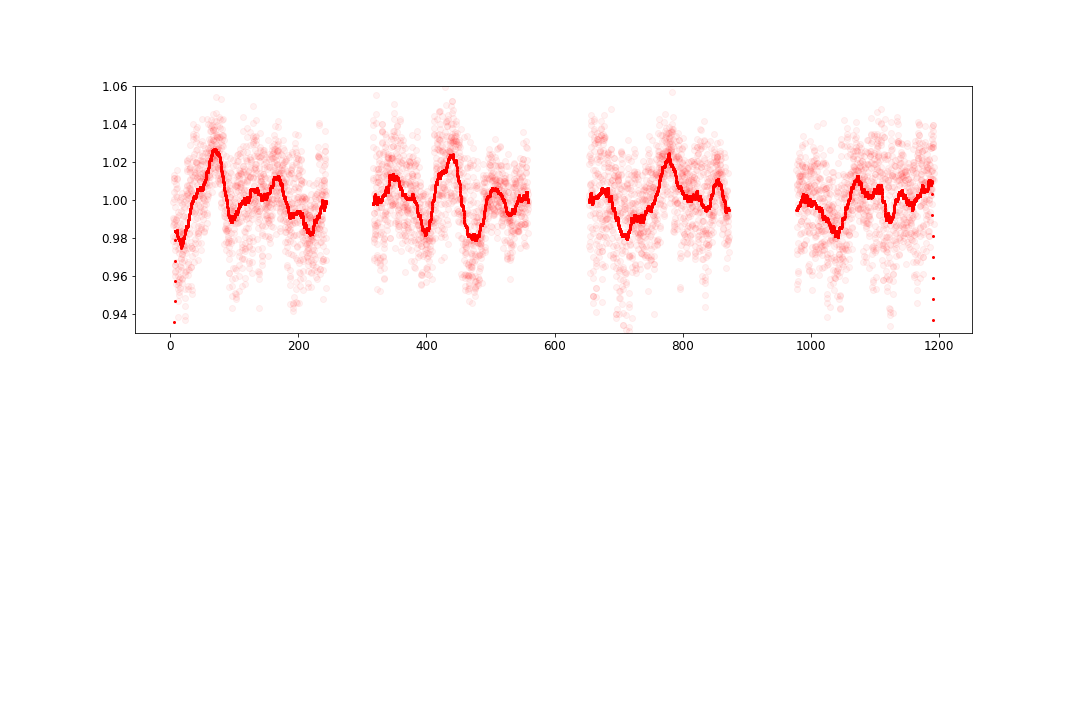

In [14]:
from astropy.convolution import convolve, Box1DKernel
save = False
%matplotlib widget

data = []
data = lc3637.copy() # full light curve
data.TIME_days = data.TIME.copy()
data.TIME = (data.TIME -data.TIME.iloc[0])*24

smoothed_signal = convolve(data.PSF_FLUX_NORM, Box1DKernel(90))
data['lc_smooth'] = smoothed_signal
data['lc_corrected'] = 1+data.PSF_FLUX_NORM - smoothed_signal

data = data.query('TIME > 4.5 & TIME < 1192')
time = data.TIME
lc = data.PSF_FLUX_NORM
lc_smooth = data.lc_smooth
segments = [(30,80), (80,130), (130,180), (180,230)]

plt.close(), plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(time, lc, ls='', marker='o', alpha=0.05, c='r')
plt.plot(time, lc_smooth, ls='', marker='o', ms=2, c='r')
plt.ylim((0.93, 1.06))#, plt.xlim((5, 1196))

plt.subplot(212), plt.plot(time, lc-lc_smooth, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1))#, plt.xlim((5, 1196))

plt.figure(figsize=(
    15,15))
plt.subplot(411), plt.plot(time, lc-lc_smooth, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((30, 80))
plt.subplot(412), plt.plot(time, lc-lc_smooth, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((1080, 1130))
plt.subplot(413), plt.plot(time, lc-lc_smooth, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((430, 480))
plt.subplot(414), plt.plot(time, lc-lc_smooth, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((680, 730))

# write data files
outpath2 = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/"
lc_out_path2 = "luhman_16ab_sector36-37_longPeriodsRemoved.txt"
if save: data.to_csv(outpath2+lc_out_path2, sep='\t', index=False)

smoothed_signal = convolve(data.PSF_FLUX_NORM, Box1DKernel(20))
data['lc_smooth'] = smoothed_signal
data['lc_corrected'] = 1+data.PSF_FLUX_NORM - smoothed_signal

save=False
# write data files
outpath3 = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/"
lc_out_path3 = "luhman_16ab_sector36-37_longPeriodsRemoved_wd20hr.txt"
if save: data.to_csv(outpath3+lc_out_path3, sep='\t', index=False)

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(time, lc, ls='', marker='o', alpha=0.05, c='r')
plt.plot(time, lc_smooth, ls='', marker='o', ms=2, c='r')
plt.ylim((0.93, 1.06))#, plt.xlim((5, 1196))

(0.93, 1.06)

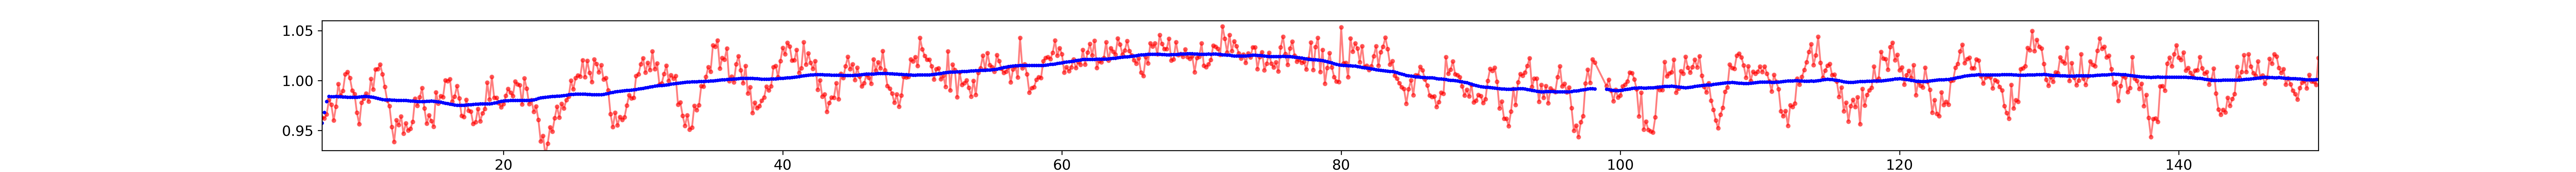

In [29]:
%matplotlib widget
plt.figure(figsize=(30,2), dpi=300)
plt.plot(time, lc, ls='-', marker='.', alpha=0.5, c='r')
plt.plot(time, lc_smooth, ls='', marker='o', ms=2, c='b')
plt.xlim((7, 150))
plt.ylim((0.93, 1.06))